# 8장 텍스트 빈도 분석 영어편

In [20]:
import pandas as pd
import glob #파일처리
import re #정규식 작성
from functools import reduce #2차원을 1차원으로 
from nltk.stem import WordNetLemmatizer #표제어 추출
from collections import Counter #개수 카운트
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud #불용어모듈, 그냥 모듈

In [33]:
import nltk
nltk.download('stopwords') #불용어 정보
nltk.download('punkt') #단어 토큰화 해주는 word_tokenize가 있는 패키지
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkksk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkksk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kkksk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kkksk\AppData\Roaming\nltk_data...


True

In [15]:
add_files = glob.glob('./Riss_data/myCabinetExcelData*.xls')
add_files

['./Riss_data\\myCabinetExcelData (1).xls',
 './Riss_data\\myCabinetExcelData (2).xls',
 './Riss_data\\myCabinetExcelData (3).xls',
 './Riss_data\\myCabinetExcelData (4).xls',
 './Riss_data\\myCabinetExcelData (5).xls',
 './Riss_data\\myCabinetExcelData (6).xls',
 './Riss_data\\myCabinetExcelData (7).xls',
 './Riss_data\\myCabinetExcelData (8).xls',
 './Riss_data\\myCabinetExcelData (9).xls',
 './Riss_data\\myCabinetExcelData.xls']

In [16]:
add_files_data=[]
for file in add_files :
    df = pd.read_excel(file)
    add_files_data.append(df)

add_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
1,NaN,2,Call for Papers: Big Data,"Obradovic, Zoran",Mary Ann Leibert,2022
2,NaN,3,Big data drives the development of Earth science,"Guo, Huadong",John Wiley & Sons Ltd,2017
3,NaN,4,Big data in support of the Sustainable Develop...,"Guo, Huadong; Hackmann, Heide; Gong, Ke",John Wiley & Sons Ltd,2021
4,NaN,5,MonkeyKing: Adaptive Parameter Tuning on Big D...,"Du, Haizhou; Han, Ping; Xiang, Qiao; Huang, Sheng",Mary Ann Leibert,2020
...,...,...,...,...,...,...
95,NaN,96,Fast approaches for semantic service compositi...,"Huang, Jun; Zhou, Yide; Duan, Qiang; Xing, Con...",Inderscience,2019
96,NaN,97,Towards quality-of-service driven consistency ...,"García-Recuero, Álvaro; Esteves, Sérgio; Veiga...",Inderscience,2014
97,NaN,98,Towards Max-Min Fair Resource Allocation for S...,"Jiang, Y.; Huang, Z.; Tsang, D. H.",unknown,2018
98,NaN,99,Fuzzy Based Scalable Clustering Algorithms for...,"Bharill, N.; Tiwari, A.; Malviya, A.",unknown,2016


In [17]:
add_files_data_concat = pd.concat(add_files_data,axis=0,ignore_index=True) #병합해주는함수 concat
add_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
1,NaN,2,Call for Papers: Big Data,"Obradovic, Zoran",Mary Ann Leibert,2022
2,NaN,3,Big data drives the development of Earth science,"Guo, Huadong",John Wiley & Sons Ltd,2017
3,NaN,4,Big data in support of the Sustainable Develop...,"Guo, Huadong; Hackmann, Heide; Gong, Ke",John Wiley & Sons Ltd,2021
4,NaN,5,MonkeyKing: Adaptive Parameter Tuning on Big D...,"Du, Haizhou; Han, Ping; Xiang, Qiao; Huang, Sheng",Mary Ann Leibert,2020
...,...,...,...,...,...,...
995,NaN,96,Internet of Things-Based Optimized Routing and...,"Menon, Varun G.; Verma, Sandeep; Kaur, Satnam;...",Mary Ann Leibert,2021
996,NaN,97,Call for Special Issue Papers: Programming Mod...,"Al-Turjman, Fadi; Hamouda, Walaa; Mumtaz, Shahid",Mary Ann Leibert,2020
997,NaN,98,A Message from the Editor-in-Chief of Big Data,unknown,Mary Ann Leibert,2017
998,NaN,99,Call for Special Issue Papers: Soft Computing ...,"Chilamkurti, Naveen; Paul, Anand; Kumar, Akshi",Mary Ann Leibert,2020


# 데이터 전처리

In [18]:
all_title=add_files_data_concat['제목']
all_title

0      An Ensemble-Based Scalable Approach for Intrus...
1                              Call for Papers: Big Data
2       Big data drives the development of Earth science
3      Big data in support of the Sustainable Develop...
4      MonkeyKing: Adaptive Parameter Tuning on Big D...
                             ...                        
995    Internet of Things-Based Optimized Routing and...
996    Call for Special Issue Papers: Programming Mod...
997       A Message from the Editor-in-Chief of Big Data
998    Call for Special Issue Papers: Soft Computing ...
999    Toward Business Process Innovation in the Big ...
Name: 제목, Length: 1000, dtype: object

In [24]:
stopWords=set(stopwords.words("english")) #불용어 추출
lemma = WordNetLemmatizer() #표제어 추출

In [37]:
words=[]

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(title)) #알파벳으로 시작하지 않는 단어는 공백으로 치환 후 제거
    EnWordsToken = word_tokenize(EnWords.lower()) #소문자화하고 토큰화
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] #불용어 제거
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] #표제어 추출
    words.append(EnWordsTokenStopLemma)
    
print(words)

[['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework'], ['call', 'paper', 'big', 'data'], ['big', 'data', 'drive', 'development', 'earth', 'science'], ['big', 'data', 'support', 'sustainable', 'development', 'goal', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goal', 'cbas'], ['monkeyking', 'adaptive', 'parameter', 'tuning', 'big', 'data', 'platform', 'deep', 'reinforcement', 'learning'], ['big', 'data', 'analytics', 'capability', 'digital', 'transformation', 'insurance', 'sector'], ['mr', 'dp', 'improving', 'performance', 'resource', 'utilization', 'big', 'data', 'application', 'deadline', 'priority'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'business'], ['correction', 'big', 'data'], ['call', 'special', 'issue', 'paper', 'soft', 'computing', 'model', 'big', 'data', 'internet', 'thing'], ['research', 'dilemma', 'behavioral', 'big', 'data'], ['call

In [36]:
words2 = list(reduce(lambda x, y : x+y, words)) #1차원 배열로 변경
print(words2)

['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'call', 'paper', 'big', 'data', 'big', 'data', 'drive', 'development', 'earth', 'science', 'big', 'data', 'support', 'sustainable', 'development', 'goal', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goal', 'cbas', 'monkeyking', 'adaptive', 'parameter', 'tuning', 'big', 'data', 'platform', 'deep', 'reinforcement', 'learning', 'big', 'data', 'analytics', 'capability', 'digital', 'transformation', 'insurance', 'sector', 'mr', 'dp', 'improving', 'performance', 'resource', 'utilization', 'big', 'data', 'application', 'deadline', 'priority', 'call', 'special', 'issue', 'paper', 'big', 'data', 'business', 'correction', 'big', 'data', 'call', 'special', 'issue', 'paper', 'soft', 'computing', 'model', 'big', 'data', 'internet', 'thing', 'research', 'dilemma', 'behavioral', 'big', 'data', 'call', 'paper', 'special', 

In [38]:
count = Counter(words2)

count

Counter({'ensemble': 5,
         'based': 95,
         'scalable': 20,
         'approach': 55,
         'intrusion': 2,
         'detection': 15,
         'using': 59,
         'big': 1116,
         'data': 1217,
         'framework': 34,
         'call': 45,
         'paper': 43,
         'drive': 3,
         'development': 24,
         'earth': 25,
         'science': 35,
         'support': 13,
         'sustainable': 19,
         'goal': 16,
         'celebration': 4,
         'establishment': 5,
         'international': 7,
         'research': 28,
         'center': 10,
         'cbas': 4,
         'monkeyking': 2,
         'adaptive': 6,
         'parameter': 2,
         'tuning': 2,
         'platform': 40,
         'deep': 17,
         'reinforcement': 2,
         'learning': 47,
         'analytics': 131,
         'capability': 8,
         'digital': 19,
         'transformation': 8,
         'insurance': 3,
         'sector': 5,
         'mr': 3,
         'dp': 2,
         

# 단어 빈도 구하기

In [39]:
word_count = dict() #딕셔너리 개체, 사전식으로 표현하기 좋음

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

data : 1217
big : 1116
analytics : 131
based : 95
analysis : 93
system : 64
using : 59
issue : 58
approach : 55
special : 50
driven : 48
learning : 47
call : 45
application : 45
model : 45
paper : 43
new : 43
platform : 40
challenge : 38
science : 35
health : 35
framework : 34
management : 34
cloud : 34
algorithm : 33
computing : 32
processing : 32
research : 28
era : 28
distributed : 27
earth : 25
perspective : 25
smart : 25
service : 25
network : 25
development : 24
opportunity : 24
machine : 24
review : 23
technology : 23
business : 22
internet : 22
mining : 22
performance : 21
intelligence : 21
editorial : 21
method : 21
scalable : 20
optimization : 20
use : 20


# 히스토그램 그리기

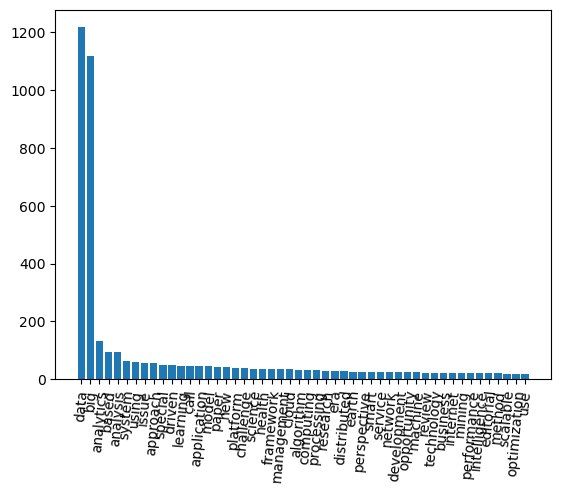

In [42]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)),sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

# 결과 시각화

In [43]:
add_files_data_concat['doc_count']=0
summary_year = add_files_data_concat.groupby('출판일',as_index = False)['doc_count'].count()

summary_year

,출판일,doc_count
0,1999,1
1,2004,1
2,2011,3
3,2012,14
4,2013,49
5,2014,111
6,2015,98
7,2016,133
8,2017,144
9,2018,124


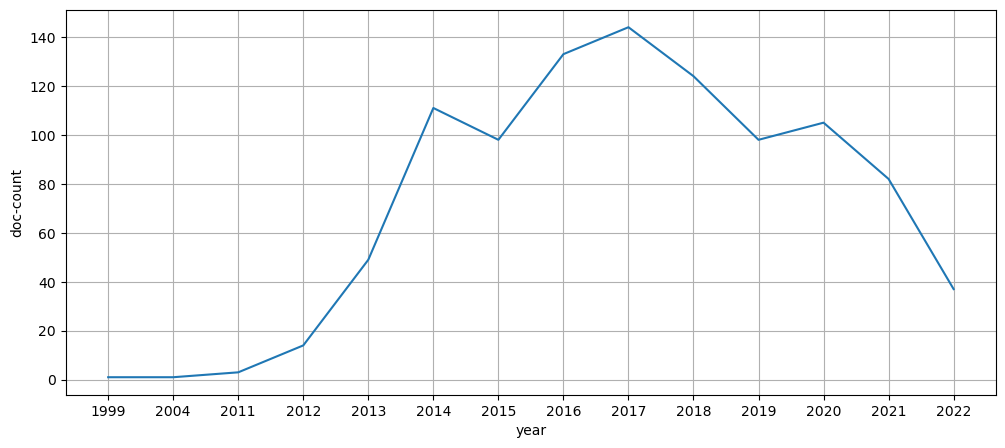

In [44]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

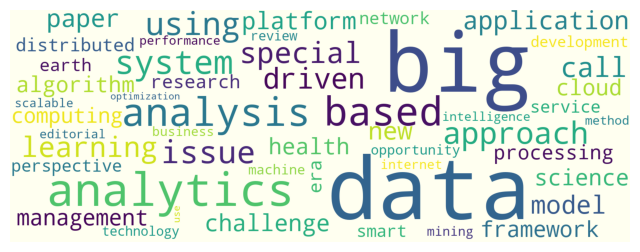

In [48]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width =1600, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()